In [1]:
from _settings import *
import pandas as pd
from datetime import datetime, timedelta
import os

url = 'https://danjuanapp.com/djmodule/value-center?channel=1300100141'
today = str(datetime.now())[:10]
etf_path = '../../database/finance/etf/'
etf_fn = 'xq_' + today + '.txt'

soup_xq = get_soup(url)

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml"><head><title>估值排行(2019-12-26)</title><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width,initial-scale=1,maximum-scale=1,viewport-fit=cover" name="viewport"/><meta content="telephone=no" name="format-detection"/><link href="https://danjuanapp.com/images/logo_128@1.png" rel="shortcut icon"/><link href="https://danjuanapp.com/images/logo_32@1.png" rel="icon" sizes="32x32"/><link href="https://danjuanapp.com/images/logo_48@1.png" rel="icon" sizes="48x48"/><link href="https://danjuanapp.com/images/logo_64@1.png" rel="icon" sizes="64x64"/><link href="https://danjuanapp.com/images/logo_128@1.png" rel="icon" sizes="128x128"/><style type="text/css">.disable-a-link[data-v-42a5efc2]{pointer-events:none;cursor:default}blockquote[data-v-42a5efc2],body[data-v-42a5efc2],button[data-v-42a5efc2],dd[data-v-42a5efc2],dl[data-v-42a5efc2],dt[data-v-42a5efc2],fieldset[data-v-42a5efc2],form[
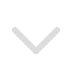
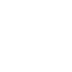

In [2]:
soup_xq

In [7]:
table = soup_xq.find("div", {'class': 'container'})
table

<div class="container"><div class="ver-wrap1 out-dj"><div class="header"><div class="in-box"><div class="name"></div><div class="pe header-item">PE</div><div class="pe-per header-item">PE百分位</div><div class="pb header-item">PB</div><div class="pb-per header-item">PB百分位</div><div class="dyr header-item">股息率</div><div class="roe header-item">ROE</div><div class="begin header-item">预测PEG</div></div></div></div><div class="ver-wrap2 out-dj"><div class="cross"><div class="in-box"><div class="name">指数名称</div></div></div></div><div class="inner-wrap"><div class="inner"><div class="out-row" style="height: 210rem;"><div class="name bg-low" style="top: 0rem;"><div class="con"><h1>标普价值</h1><small>SPACEVCP</small></div><div class="color-bar low"></div></div><div class="name bg-low" style="top: 3.75rem;"><div class="con"><h1>上证红利</h1><small>SH000015</small></div><div class="color-bar low"></div></div><div class="name bg-low" style="top: 7.5rem;"><div class="con"><h1>中证红利</h1><small>SH000922</small>

In [10]:
def parse_etf_data(soup):
    """
    
    :param soup: Beatifulsoup result of xueqiu's daily result
    :return: result_table
    """
    soup = soup_xq
    # table = soup.find("div", {'class': 'out-row'})
    table = soup.find("div", {'class': 'out-row'}) # updated on 2019-12-27
    name = table.find_all('div', {'class': (lambda value: value.startswith('name'))})
    print("Name length", len(name))
    dinfo = table.find_all('div', {'class': (lambda value: value.startswith('row'))})
    print("data length", len(dinfo))

    if len(name) == len(dinfo):
        name_table = []
        for row in name:
            name_list = []
            name_cn = row.find('h1').get_text()
            name_code = row.find('small').get_text()
            name_list = [name_cn, name_code]
            name_table.append(name_list)

        info_table = []
        for row in dinfo:
            info_list = []
            pe = row.find('div', {'class': 'pe'}).get_text()
            pe_pct = row.find('div', {'class': "pe-per"}).get_text()
            pb = row.find('div', {'class': 'pb'}).get_text()
            pb_pct = row.find('div', {'class': 'pb-per'}).get_text()
            dyr = row.find('div', {'class': 'dyr'}).get_text()
            roe = row.find('div', {'class': 'roe'}).get_text()
            since = row.find('div', {'class': 'begin'}).get_text()
            info_list = [pe, pe_pct, pb, pb_pct, dyr, roe, since]
            info_table.append(info_list)

        df_name = pd.DataFrame(name_table, columns=['name', 'code_xq'])
        df_info = pd.DataFrame(info_table, columns=['pe', 'pe_pct', 'pb', 'pb_pct',
                                                    'dyr', 'roe', 'since'])
        if df_name.shape[0] == df_info.shape[0]:
            df_final = pd.concat([df_name, df_info], axis=1)
            df_final['dt'] = today
            print(df_final.shape)
            print(today, "Update")
            df_final.to_csv(os.path.join(etf_path, etf_fn), index=False)
            with open(etf_path + 'ETF_his_xq.txt', 'a+') as f:
                df_final.to_csv(f, header=False, index=False)
            print("write files append")
            print("****" * 5)

In [11]:
parse_etf_data(soup_xq)

Name length 56
data length 56
(56, 10)
2019-12-27 Update
write files append
********************
